In [21]:
import matplotlib.pyplot as plt
import sklearn.metrics as sm
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [22]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

Text(0.5, 1.0, 'Petal')

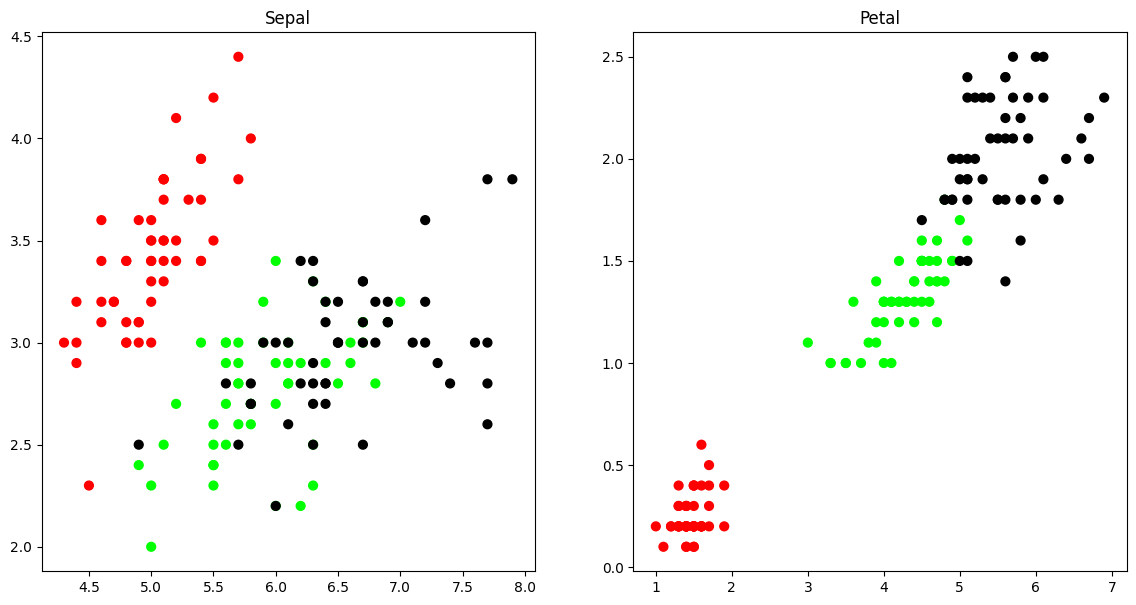

In [23]:
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])
plt.subplot(1, 2, 1)
plt.scatter(X.Sepal_Length,X.Sepal_Width, c=colormap[y.Targets], s=40)
plt.title('Sepal')
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length,X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Petal')

In [24]:
# Build model K Means Cluster
model = KMeans(n_clusters=3, random_state=100)
model.fit(X)
y_pred = model.labels_

C:\Users\ganes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [25]:
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=100)
gmm.fit(X)
y_cluster_gmm = gmm.predict(X)
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

Text(0.5, 1.0, 'GMM Classification')

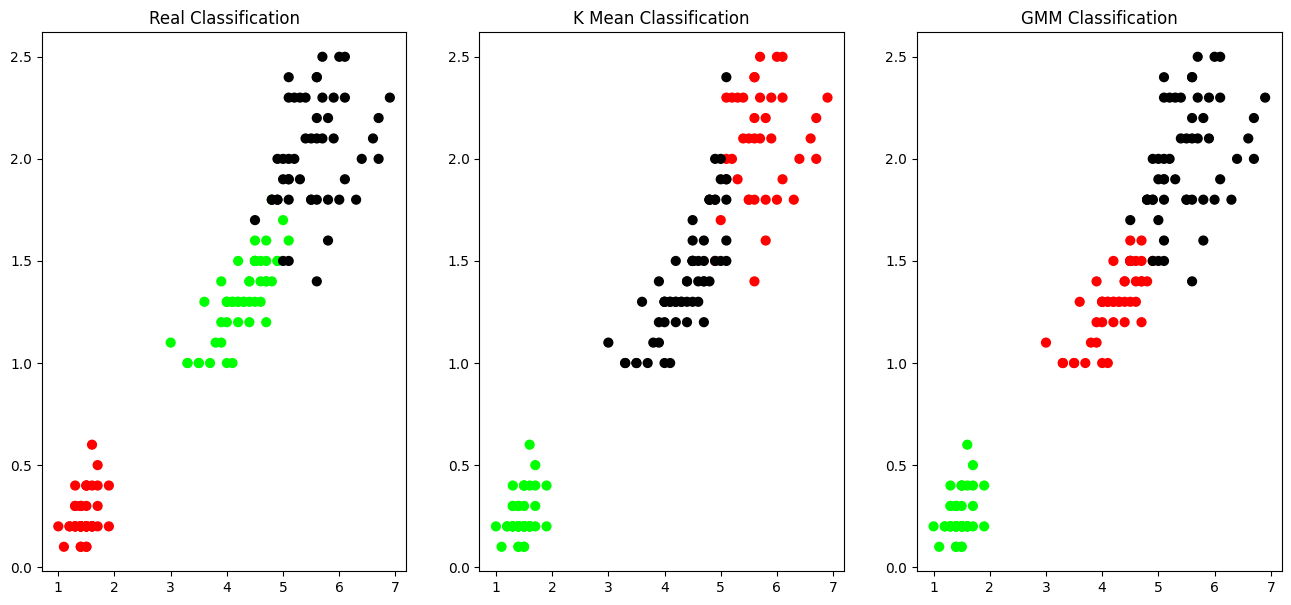

In [26]:
plt.figure(figsize=(16,7))
# Plot the Original Classifications
plt.subplot(1, 3, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')

# Plot the Models Classifications
plt.subplot(1, 3, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_pred], s=40)
plt.title('K Mean Classification')

plt.subplot(1, 3, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_cluster_gmm], s=40)
plt.title('GMM Classification')

In [27]:
# K Means Accuracy
print('K Means Accuracy')
print('Accuracy', sm.accuracy_score(y, y_pred) )
print('Confusion Matrix', sm.confusion_matrix(y, y_pred) )

# GMM Accuracy
print('GMM Accuracy')
print('Accuracy', sm.accuracy_score(y, y_cluster_gmm) )
print('Confusion Matrix', sm.confusion_matrix(y, y_cluster_gmm))

# actual


K Means Accuracy
Accuracy 0.09333333333333334
Confusion Matrix [[ 0 50  0]
 [ 2  0 48]
 [36  0 14]]
GMM Accuracy
Accuracy 0.3333333333333333
Confusion Matrix [[ 0 50  0]
 [45  0  5]
 [ 0  0 50]]
